In [0]:
from urllib.request import urlopen 
import re
def read_url(url): 
    return re.sub('\\s+', ' ', urlopen(url).read().decode())

In [0]:
huck_finn_url = 'https://www.inferentialthinking.com/data/huck_finn.txt'
huck_finn_text = read_url(huck_finn_url)
huck_finn_chapters = huck_finn_text.split('CHAPTER ')[44:]

In [0]:
from datascience import *

In [20]:
# Display the chapters of Huckleberry Finn in a table.
Table().with_column('Chapters', huck_finn_chapters)

Chapters
I. YOU don't know about me without you have read a book ...
II. WE went tiptoeing along a path amongst the trees bac ...
"III. WELL, I got a good going-over in the morning from o ..."
"IV. WELL, three or four months run along, and it was wel ..."
V. I had shut the door to. Then I turned around and ther ...
"VI. WELL, pretty soon the old man was up and around agai ..."
"VII. ""GIT up! What you 'bout?"" I opened my eyes and look ..."
VIII. THE sun was up so high when I waked that I judged ...
IX. I wanted to go and look at a place right about the m ...
X. AFTER breakfast I wanted to talk about the dead man a ...


In [0]:
import numpy as np

import matplotlib
matplotlib.use('Agg', warn=False)
%matplotlib inline

import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore",
              category=FutureWarning)

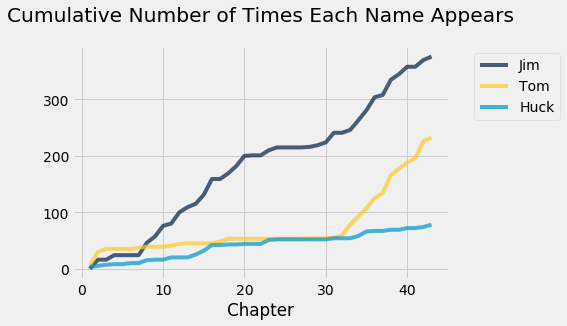

In [22]:
# Count how many times the names Jim, Tom, and Huck appear in each chapter.
counts = Table().with_columns([
        'Jim', np.char.count(huck_finn_chapters, 'Jim'),
        'Tom', np.char.count(huck_finn_chapters, 'Tom'),
        'Huck', np.char.count(huck_finn_chapters, 'Huck')
    ])

# Plot the cumulative counts:
# how many times in Chapter 1, how many times in Chapters 1 and 2, and so on.
cum_counts = counts.cumsum().with_column('Chapter', np.arange(1, 44, 1))
cum_counts.plot(column_for_xticks=3)
plots.title('Cumulative Number of Times Each Name Appears', y=1.08);

In [23]:
chars_periods_huck_finn = Table().with_columns([
        'Huck Finn Chapter Length', [len(s) for s in huck_finn_chapters],
        'Number of Periods', np.char.count(huck_finn_chapters, '.')
    ])
chars_periods_huck_finn

Huck Finn Chapter Length,Number of Periods
7026,66
11982,117
8529,72
6799,84
8166,91
14550,125
13218,127
22208,249
8081,71
7036,70


In [0]:
path_data = 'https://www.inferentialthinking.com/data/'
little_women_url = path_data + 'little_women.txt'
little_women_text = read_url(little_women_url)
little_women_chapters = little_women_text.split('CHAPTER ')[1:]

In [25]:
Table().with_column('Chapters', little_women_chapters)

Chapters
"ONE PLAYING PILGRIMS ""Christmas won't be Christmas witho ..."
TWO A MERRY CHRISTMAS Jo was the first to wake in the gr ...
"THREE THE LAURENCE BOY ""Jo! Jo! Where are you?"" cried Me ..."
"FOUR BURDENS ""Oh, dear, how hard it does seem to take up ..."
"FIVE BEING NEIGHBORLY ""What in the world are you going t ..."
SIX BETH FINDS THE PALACE BEAUTIFUL The big house did pr ...
"SEVEN AMY'S VALLEY OF HUMILIATION ""That boy is a perfect ..."
"EIGHT JO MEETS APOLLYON ""Girls, where are you going?"" as ..."
"NINE MEG GOES TO VANITY FAIR ""I do think it was the most ..."
"TEN THE P.C. AND P.O. As spring came on, a new set of am ..."


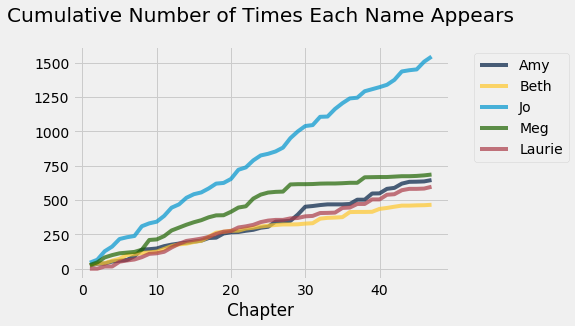

In [26]:
# Counts of names in the chapters of Little Women
counts = Table().with_columns([
        'Amy', np.char.count(little_women_chapters, 'Amy'),
        'Beth', np.char.count(little_women_chapters, 'Beth'),
        'Jo', np.char.count(little_women_chapters, 'Jo'),
        'Meg', np.char.count(little_women_chapters, 'Meg'),
        'Laurie', np.char.count(little_women_chapters, 'Laurie'),
    ])

# Plot the cumulative counts.
cum_counts = counts.cumsum().with_column('Chapter', np.arange(1, 48, 1))
cum_counts.plot(column_for_xticks=5)
plots.title('Cumulative Number of Times Each Name Appears', y=1.08);

In [27]:
chars_periods_little_women = Table().with_columns([
        'Little Women Chapter Length', [len(s) for s in little_women_chapters],
        'Number of Periods', np.char.count(little_women_chapters, '.')
    ])
chars_periods_little_women

Little Women Chapter Length,Number of Periods
21759,189
22148,188
20558,231
25526,195
23395,255
14622,140
14431,131
22476,214
33767,337
18508,185


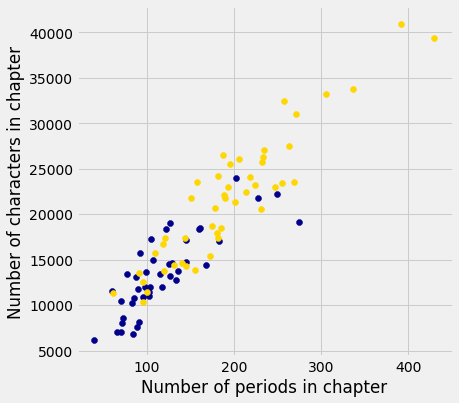

In [28]:
plots.figure(figsize=(6, 6))
plots.scatter(chars_periods_huck_finn.column(1), 
              chars_periods_huck_finn.column(0), 
              color='darkblue')
plots.scatter(chars_periods_little_women.column(1), 
              chars_periods_little_women.column(0), 
              color='gold')
plots.xlabel('Number of periods in chapter')
plots.ylabel('Number of characters in chapter');